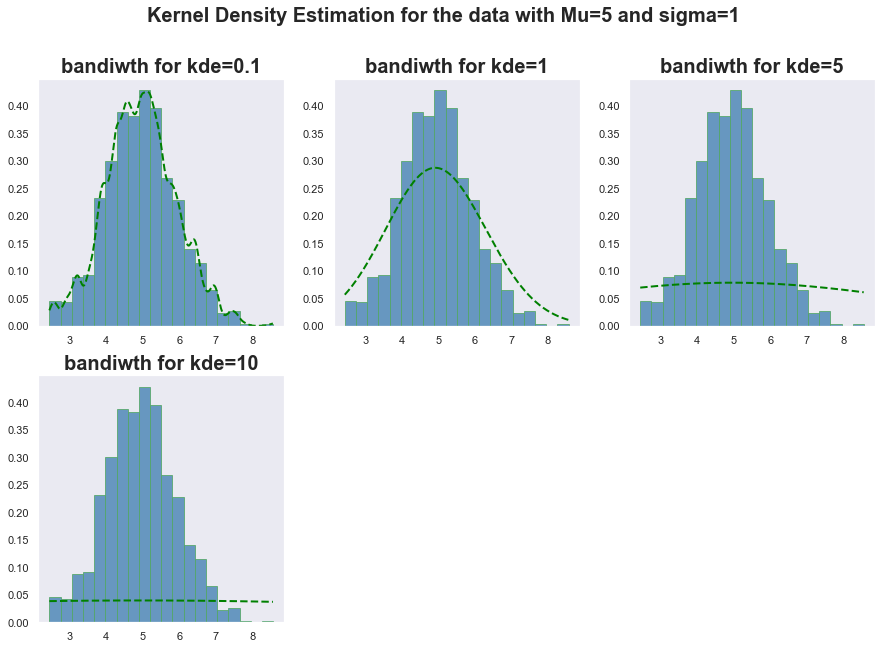

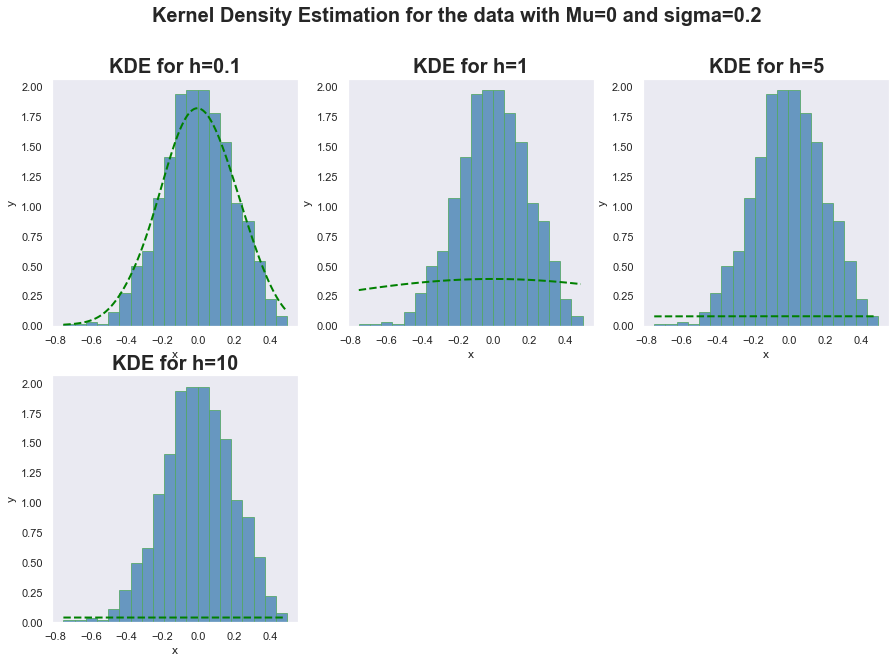

In [67]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neighbors import KernelDensity
%matplotlib inline
import numpy as np

mu, sigma = 5, 1
X_values = np.random.normal(mu, sigma, 1000)
mu1, sigma1 = 0, 0.2
X_values1 = np.random.normal(mu1, sigma1, 1000)


def mykde(X, smoothing_function, h):
    kernel_fun = dict()
    for i in X:
        kernel_fun[i] = smoothing_function(i, h)
    def eval(x):
        pdfs = list()
        for d in X: pdfs.append(kernel_fun[d](x))
        sum_pdfs=sum(pdfs) 
        return (sum_pdfs/ len(X))

    return (eval)

def gaussian_pdf(X_gauss, h):
    X_cap = X_gauss

    def eval(x):
        pi = np.sqrt(2 * np.pi * h ** 2)
        neg_pi=( pi ** -1)
        delta_X=(x - X_cap)
        delta_X_sq=(delta_X ** 2)
        band =  (2 * h ** 2)
        kde_pdf =  neg_pi * np.exp(-(delta_X_sq) /band)
        return (kde_pdf)

    return (eval)


fig, axarr = plot.subplots(figsize=(15, 10))
aX_values = np.array(X_values)
xX_values = np.arange(min(X_values), max(X_values), .01)
h = [0.1, 1, 5, 10]
plot_ind = np.arange(6) + 231
count = 0
plot.suptitle('Kernel Density Estimation for the data with Mu=5 and sigma=1', fontsize=20, fontweight="bold")
for b, ind in zip(h, plot_ind):
    dist_1 = mykde(X=X_values, smoothing_function=gaussian_pdf, h=h[count])
    y1 = [dist_1(i) for i in xX_values]
    ys1 = [dist_1(i) for i in X_values]
    plot.subplot(ind)
    plot.hist(X_values, bins=20, density=True, edgecolor='g', alpha=0.8, facecolor="steelblue")
    plot.plot(xX_values, y1, color='green', linestyle='dashed', linewidth=2, markersize=12)
    plot.title("bandiwth for kde=" + str(b),fontsize=20,fontweight="bold")
    plot.grid(False)
    count = count + 1


fig, axarr = plot.subplots(figsize=(15, 10))
aX_values = np.array(X_values1)
xX_values = np.arange(min(X_values1), max(X_values1), .01)
plot_ind = np.arange(6) + 231
count = 0
for b, ind in zip(h, plot_ind):
    dist_1 = mykde(X=X_values1, smoothing_function=gaussian_pdf, h=h[count])

    y1 = [dist_1(i) for i in xX_values]
    ys1 = [dist_1(i) for i in X_values1]
    plot.subplot(ind)
    plot.hist(X_values1, bins=20, density=True, edgecolor='g', alpha=0.8, facecolor="steelblue")
    plot.plot(xX_values, y1, color='green', linestyle='dashed', linewidth=2, markersize=12)
    count = count + 1
    plot.xlabel('x')
    plot.ylabel('y')
    plot.grid(False)
    plot.title("KDE for h=" + str(b),fontsize=20,fontweight="bold")

plot.suptitle('Kernel Density Estimation for the data with Mu=0 and sigma=0.2', fontsize=20, fontweight="bold")

plot.show()


<ipython-input-81-fb3cc7efe9fc>:39: UserWarning: The following kwargs were not used by contour: 'linestyle'
  con = plot.contour(contour1_2d_1, contour1_2d_2, p, 80, cmap='Blues',linestyle='solid')


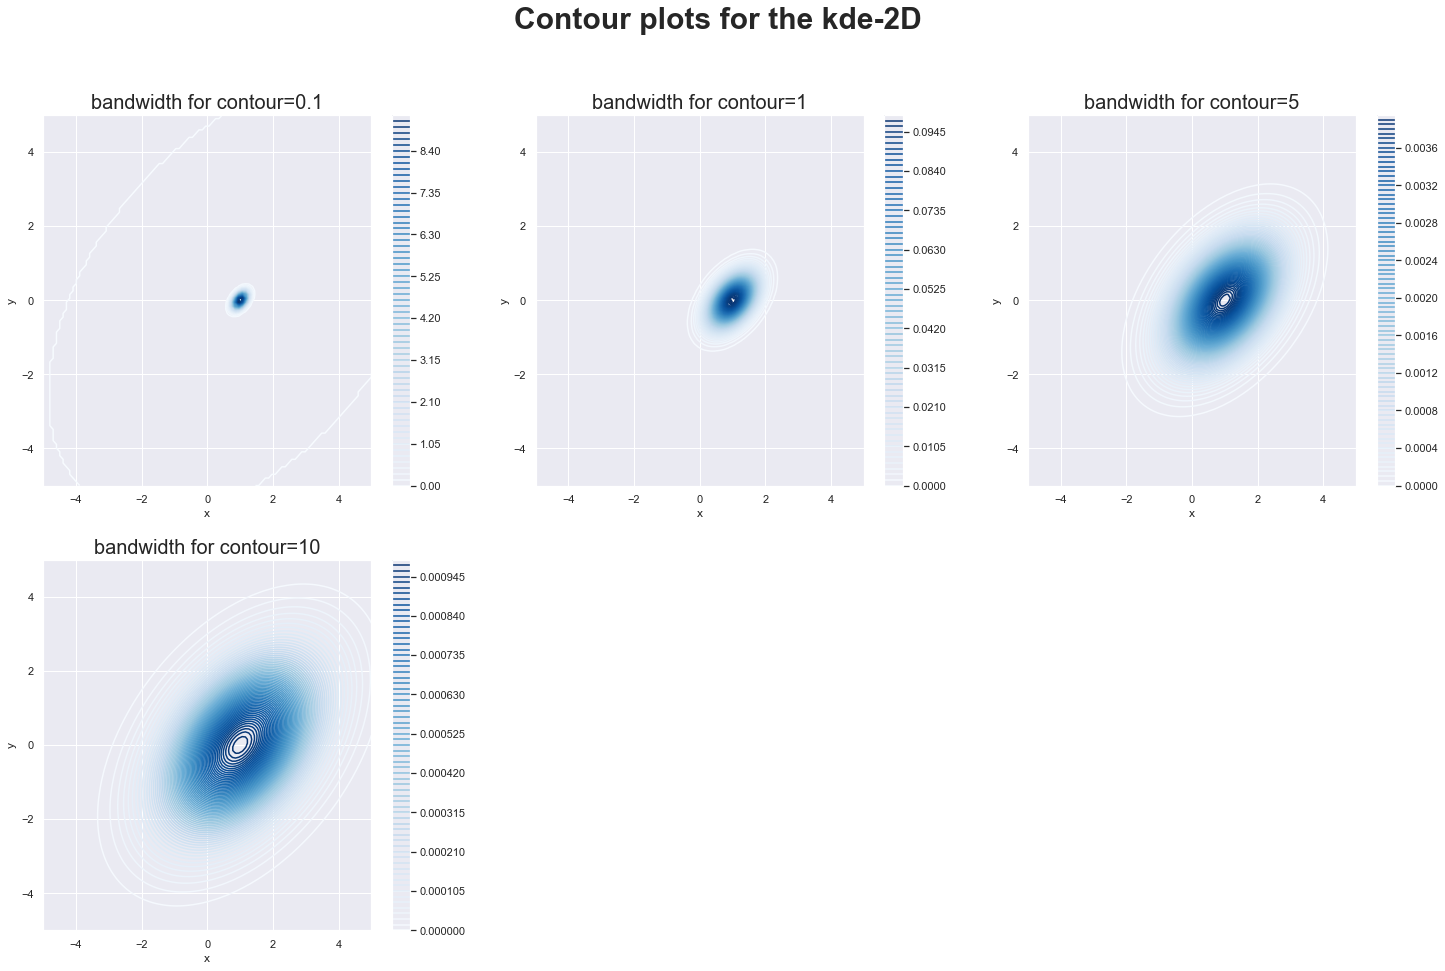

In [81]:
import numpy as nump
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as nump

def mkde2d(x, d, mu, cov,h):
    diff_x = x - mu
    pi=2 * nump.pi
    pi_d=(pi)**2
    cov1=nump.linalg.det(cov)
    band=2*h**2
    solve=nump.linalg.solve(cov, diff_x)
    sq=(nump.sqrt( pi_d * cov1)*band)
    solveT=solve.T.dot(diff_x)
    exp1=nump.exp(-(solveT) /h* 2)
    return (1. / sq*exp1)


def contour_kde(mu, cov, d,h):
    contour1_2d_1, contour1_2d_2 = nump.meshgrid(nump.linspace(-5, 5, num=100), nump.linspace(-5, 5, num=100))
    pdf = nump.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            mat=nump.matrix([[contour1_2d_1[i,j]], [contour1_2d_2[i,j]]])
            pdf[i,j] = mkde2d(mat,2, mu, cov,h)
    return contour1_2d_1, contour1_2d_2, pdf

fig, acontour1_2d_1 = plot.subplots(figsize=(25,15))
d = 2
plot.suptitle('Contour plots for the kde-2D', fontsize=30, fontweight="bold")
twod_mu = nump.matrix([[1.], [0.]])
twod_sigma = nump.matrix([[0.9, 0.4],[0.4, 0.9]])
bandwidth=[0.1,1,5,10]
plot_ind = nump.arange(6)+231
count = 0
for b,ind in zip(bandwidth,plot_ind):
    contour1_2d_1, contour1_2d_2, p = contour_kde(twod_mu, twod_sigma, d,bandwidth[count])
    plot.subplot(ind)
    con = plot.contour(contour1_2d_1, contour1_2d_2, p, 80, cmap='Blues',linestyle='solid')
    plot.title("bandwidth for contour="+str(b),fontsize=20)
    count=count+1
    fig.colorbar(con)
    plot.grid(True)
    plot.xlabel('x')
    plot.ylabel('y')

plot.show()
